<a href="https://colab.research.google.com/github/rupeshryan/DS-by-Srinivas/blob/main/Normal_Distribution_Stocks_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Finding which stock is high risk, give more than 2% loss or profit, expected daily returns.

In [5]:
import pandas as pd
import numpy as np
from scipy import stats

In [7]:
beml_df= pd.read_csv('/content/BEML stock.csv')
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [9]:
glaxo_df= pd.read_csv('/content/GLAXO stock.csv')
glaxo_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [11]:
#As we don't need all cloumns apart from date and close price to calcuate gain- we slice data
beml_df= beml_df[['Date','Close']]
beml_df.head()

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05


In [13]:
glaxo_df= glaxo_df[['Date','Close']]
glaxo_df.head()

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80


In [14]:
#As the data has date cloumn we can use that as index, to ensure rows are sorted in ascending order

In [15]:
beml_df= beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))
glaxo_df= glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))

In [16]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0, 0.5, 'Close Price')

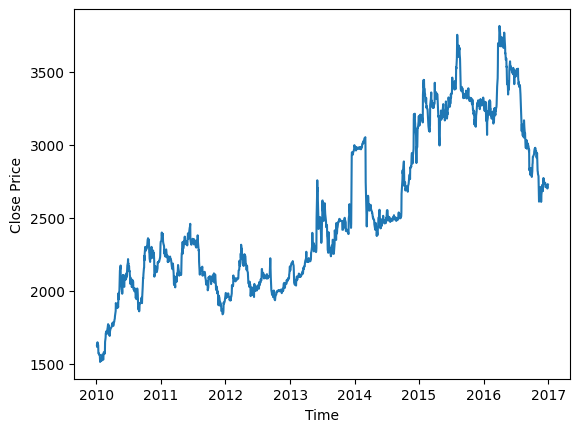

In [18]:
plt.plot(glaxo_df.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')

Text(0, 0.5, 'Close Price')

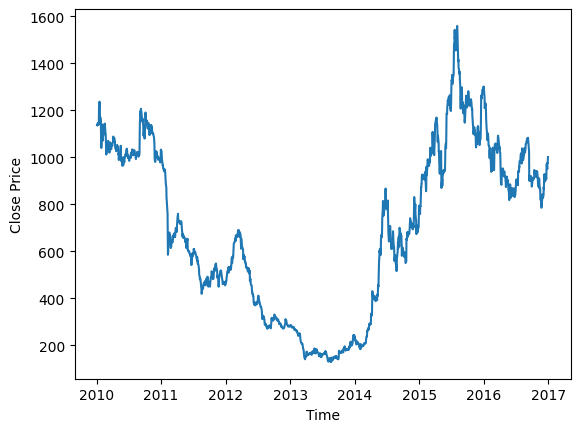

In [20]:
plt.plot(beml_df.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')

In [21]:
#Adding Gain Column

In [22]:
glaxo_df['gain']= glaxo_df.Close.pct_change(periods =1)
beml_df['gain']= beml_df.Close.pct_change(periods=1)

In [23]:
#Drop first row as it will be NaN
galxo_df= glaxo_df.dropna()
beml_df= beml_df.dropna()

Text(0, 0.5, 'gain')

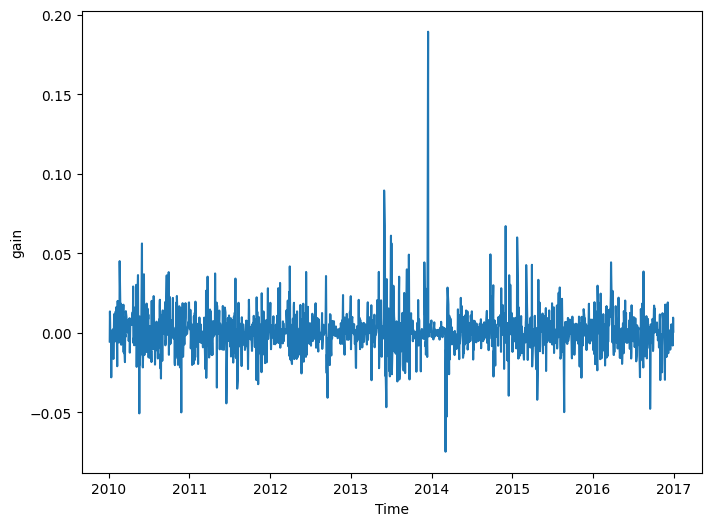

In [28]:
#plotting the gain
plt.figure(figsize=(8,6))
plt.plot(glaxo_df.index, glaxo_df.gain)
plt.xlabel('Time')
plt.ylabel('gain')

<ipython-input-30-fd3a853a3dc8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(galxo_df.gain, label = "Galxo")


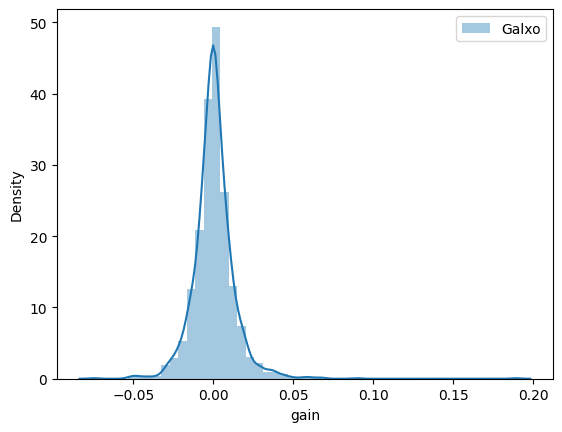

In [30]:
sn.distplot(galxo_df.gain, label = "Galxo")
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()

<ipython-input-35-cf1740d5097a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(beml_df.gain, label="BEML")


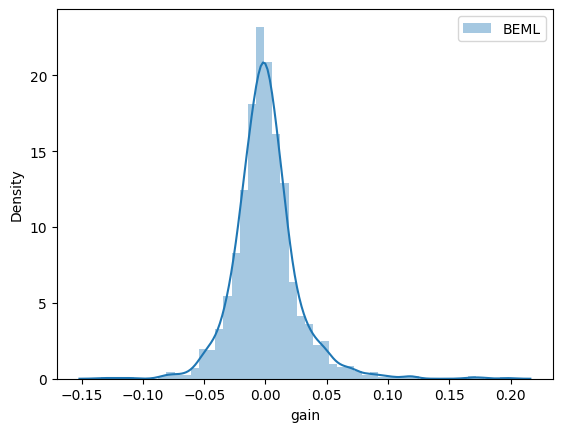

In [35]:
sn.distplot(beml_df.gain, label="BEML")
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()


In [36]:
glaxo_df.gain.mean()

0.0003860410825922916

In [41]:
print ('Mean:', round(glaxo_df.gain.mean(), 4))   #to print in format, 4 is to say how much round off to do.
print ('Standard Deviation:', round(glaxo_df.gain.std(),4))

Mean: 0.0004
Standard Deviation: 0.0134


In [42]:
print('Mean:', round(beml_df.gain.mean(),4))
print("Standard Deviation:", round(beml_df.gain.std(),4))

Mean: 0.0003
Standard Deviation: 0.0264


In [46]:
#Probability of maling 2% or more loss for Glaxo
stats.norm.cdf(-0.02,0.0004,0.0134)

0.06395593743937553

In [47]:
stats.norm.cdf(-0.02,loc=glaxo_df.gain.mean(),scale=glaxo_df.gain.std())

0.06352488667177401

In [50]:
#Probability of maling 2% or more Gain for Glaxo
1-stats.norm.cdf(0.02,loc=glaxo_df.gain.mean(),scale=glaxo_df.gain.std())

0.07104511457618568

In [52]:
#Probability of maling 2% or more loss for BEML
stats.norm.cdf(-0.02,loc=beml_df.gain.mean(),scale=beml_df.gain.std())

0.22155987503755292

In [53]:
#Probability of maling 2% or more Gain for Glaxo
1-stats.norm.cdf(0.02,loc=beml_df.gain.mean(),scale=beml_df.gain.std())

0.22769829484075355